# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [128]:
### Observable Trends:
#1. There is a strong relationship that exists between the latitude of a geographic location and the max temperature. It can be seen in the linear regression model that as the location approches the equator (0 Latitude), the max temperature rises.
#2. The highest temperatures are observed at locations with a latitude closest to 0.
#3. There appears to be little correlation between the latitude of a geographic location and its humidity, cloudiness, and wind speed experienced at that location. 

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [88]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [89]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q=" 


# Get weather data

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind = []
country = []
date = []

print("Beginning Data Retrieval")     
print("-----------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_number+=1             
        
    except:
        print("City not found. Skipping...")
        pass
    
    
    
    print(f"Processing Record {city_number} |  {city}")
city_number = 0
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 |  hobart
Processing Record 2 |  narsaq
Processing Record 3 |  cape town
Processing Record 4 |  chuy
Processing Record 5 |  charleville
Processing Record 6 |  port alfred
Processing Record 7 |  puerto ayora
Processing Record 8 |  mataura
Processing Record 9 |  dikson
Processing Record 10 |  jamestown
Processing Record 11 |  kavieng
Processing Record 12 |  san jose
City not found. Skipping...
Processing Record 12 |  taolanaro
Processing Record 13 |  pevek
Processing Record 14 |  ewo
City not found. Skipping...
Processing Record 14 |  illoqqortoormiut
Processing Record 15 |  hualmay
Processing Record 16 |  busselton
Processing Record 17 |  albany
Processing Record 18 |  bluff
Processing Record 19 |  nikolskoye
Processing Record 20 |  havre-saint-pierre
Processing Record 21 |  torbay
Processing Record 22 |  arlit
Processing Record 23 |  tasiilaq
Processing Record 24 |  mahuva
Processing Record 25 |  sarahan
Process

In [91]:
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp, 
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [92]:
weather_data.to_csv("output_data\cities.csv")

In [93]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,54.01,96,90,1.99,AU,1623942850
1,Narsaq,60.9167,-46.0500,53.82,71,56,6.46,GL,1623942850
2,Cape Town,-33.9258,18.4232,64.09,82,94,1.01,ZA,1623942673
3,Chui,-33.6971,-53.4616,53.35,79,100,10.87,UY,1623942851
4,Charleville,-26.4000,146.2500,42.87,87,18,0.00,AU,1623942851


In [94]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,19.930702,19.593779,70.407325,65.673077,50.512238,8.040472,1.623943e+09
std,32.993356,89.315825,16.440567,23.696559,39.471352,5.756019,9.334248e+01
min,-54.800000,-179.166700,30.310000,4.000000,0.000000,0.000000,1.623942e+09
25%,-7.102425,-57.463075,59.035000,51.000000,6.000000,3.620000,1.623943e+09
50%,24.516250,22.189300,73.715000,71.000000,51.000000,6.765000,1.623943e+09
75%,46.708550,96.217525,81.507500,84.000000,94.000000,11.457500,1.623943e+09
max,78.218600,179.316700,105.870000,100.000000,100.000000,32.480000,1.623943e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [95]:
clean_city_data = weather_data.loc[weather_data['Humidity'] <= 100, :]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,54.01,96,90,1.99,AU,1623942850
1,Narsaq,60.9167,-46.0500,53.82,71,56,6.46,GL,1623942850
2,Cape Town,-33.9258,18.4232,64.09,82,94,1.01,ZA,1623942673
3,Chui,-33.6971,-53.4616,53.35,79,100,10.87,UY,1623942851
4,Charleville,-26.4000,146.2500,42.87,87,18,0.00,AU,1623942851


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

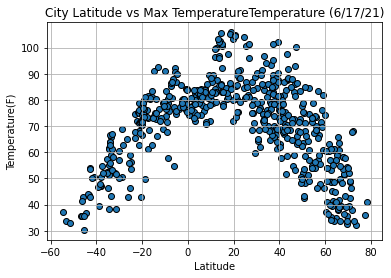

In [97]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.title('City Latitude vs Max TemperatureTemperature (6/17/21)')
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()

In [ ]:
# This scatter plot is analyzing the relationship between the Latitude of a geographic location and the temperature of that location.

##Latitude vs. Humidity Plot

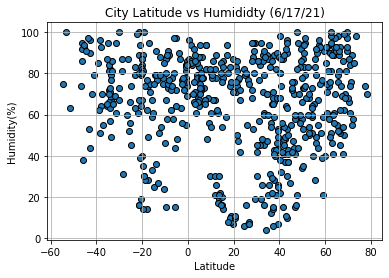

In [98]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs Humididty (6/17/21)')
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

In [99]:
# This scatter plot is analyzing the relationship between the Latitude of a geographic location and the humidity of that location.

## Latitude vs. Cloudiness Plot

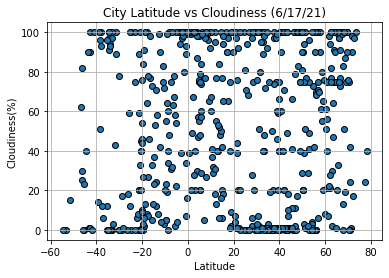

In [100]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs Cloudiness (6/17/21)')
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

In [101]:
# This scatter plot is analyzing the relationship between the Latitude of a geographic location and the cloudiness of that location.

## Latitude vs. Wind Speed Plot

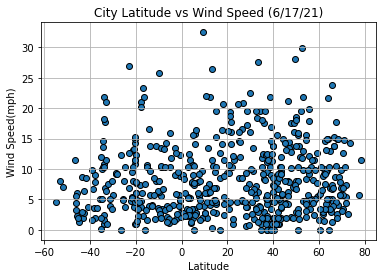

In [103]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('City Latitude vs Wind Speed (6/17/21)')
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

In [104]:
# This scatter plot is analyzing the relationship between the Latitude of a geographic location and the wind speed of that location.

## Linear Regression

In [105]:
northern_data = clean_city_data.loc[clean_city_data['Lat'] >= 0, :]
southern_data = clean_city_data.loc[clean_city_data['Lat'] <= 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

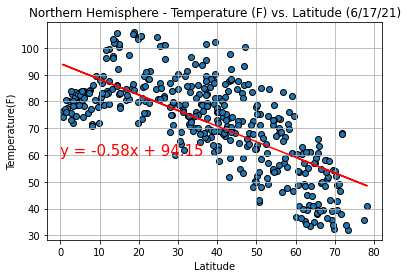

The r-squared is: 0.5054395985078213


In [107]:
x_values = northern_data['Lat']
y_values = northern_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude (6/17/21)')
plt.grid()
plt.savefig("output_data/Fig5.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

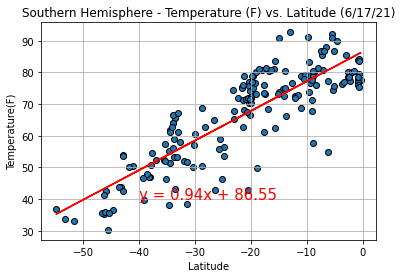

The r-squared is: 0.7217773482616066


In [108]:
x_values = southern_data['Lat']
y_values = southern_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude (6/17/21)')
plt.grid()
plt.savefig("output_data/Fig6.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [124]:
# The previous 2 linear regression models are showing the relationship between the latitude of a geographic location and its max temperature.
# It can be seen that as the location approches the equator (0 Latitude), the max temperature rises. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

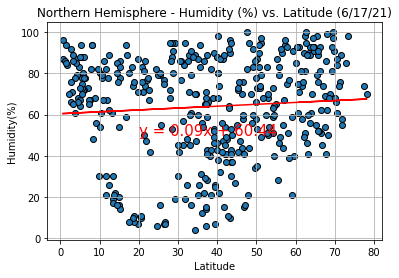

The r-squared is: 0.005697617213822056


In [113]:
x_values = northern_data['Lat']
y_values = northern_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude (6/17/21)')
plt.grid()
plt.savefig("output_data/Fig7.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

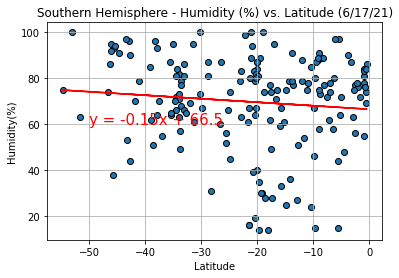

The r-squared is: 0.009987194615310517


In [115]:
x_values = southern_data['Lat']
y_values = southern_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude (6/17/21)')
plt.grid()
plt.savefig("output_data/Fig8.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [125]:
# The previous 2 linear regression models are showing the relationship between the latitude of a geographic location and its humidity. 
# It appears there is little correlation between the two variables. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

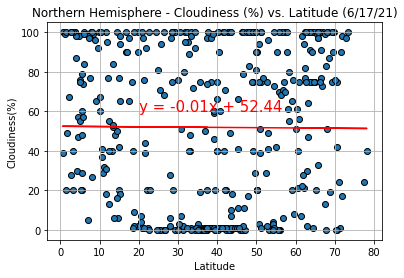

The r-squared is: 5.422011019008918e-05


In [119]:
x_values = northern_data['Lat']
y_values = northern_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude (6/17/21)')
plt.grid()
plt.savefig("output_data/Fig9.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

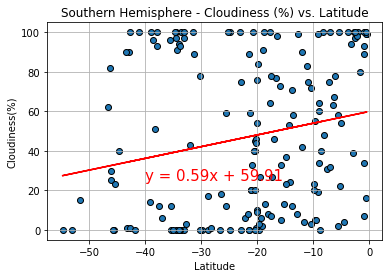

The r-squared is: 0.04267520482370173


In [121]:
x_values = southern_data['Lat']
y_values = southern_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.grid()
plt.savefig("output_data/Fig10.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [126]:
# The previous 2 linear regression models are showing the relationship between the latitude of a geographic location and its cloudiness. 
# It appears there is little correlation between the two variables. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

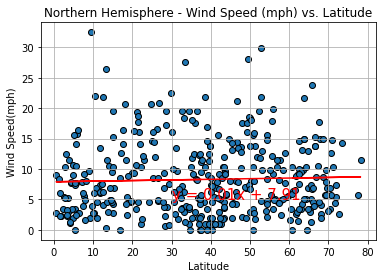

The r-squared is: 0.0012510999472281187


In [122]:
x_values = northern_data['Lat']
y_values = northern_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.grid()
plt.savefig("output_data/Fig11.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

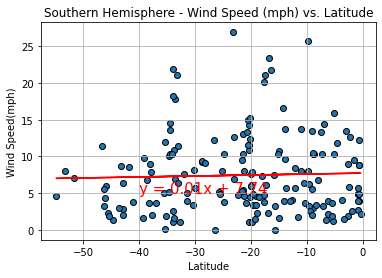

The r-squared is: 0.0011424513669609216


In [123]:
x_values = southern_data['Lat']
y_values = southern_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.grid()
plt.savefig("output_data/Fig12.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [127]:
# The previous 2 linear regression models are showing the relationship between the latitude of a geographic location and its wind speed. 
# It appears there is little correlation between the two variables. 